In [1]:
import numpy as np
import os

import dataserver as ds
from  model import Modelrunner, ModelDef
from dataserver import FileServer


In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
model_def = ModelDef(64, 8, 32)
modelrunner = Modelrunner(model_def, True)

dataserver = FileServer(
    session_dirs=["data/good/2020-11-12-09-36-01-591"]
)

Loaded models/metaencoder.pt
Loaded models/decoder.pt
{'index': 0, 'suit': 4, 'session': '2020-11-12-09-36-01-591', 'samples': 404768}
{'index': 1, 'suit': 5, 'session': '2020-11-12-09-36-01-591', 'samples': 420336}
{'index': 2, 'suit': 1, 'session': '2020-11-12-09-36-01-591', 'samples': 266880}
{'index': 3, 'suit': 3, 'session': '2020-11-12-09-36-01-591', 'samples': 393648}
{'index': 4, 'suit': 6, 'session': '2020-11-12-09-36-01-591', 'samples': 363624}
Loaded: 5 Sessions


In [14]:
encodings = []
sequences = dataserver.get_batches()
sequences = {i + 1 : data for i, data in enumerate(sequences.values())}



Got batches: recording 0 ((64, 6324, 8))
Got batches: recording 1 ((64, 6567, 8))
Got batches: recording 2 ((64, 4169, 8))
Got batches: recording 3 ((64, 6150, 8))
Got batches: recording 4 ((64, 5681, 8))


In [25]:

encodings, meta_encodings = modelrunner.evaluate(sequences)

(6324, 32)
-3.6686249 4.783699


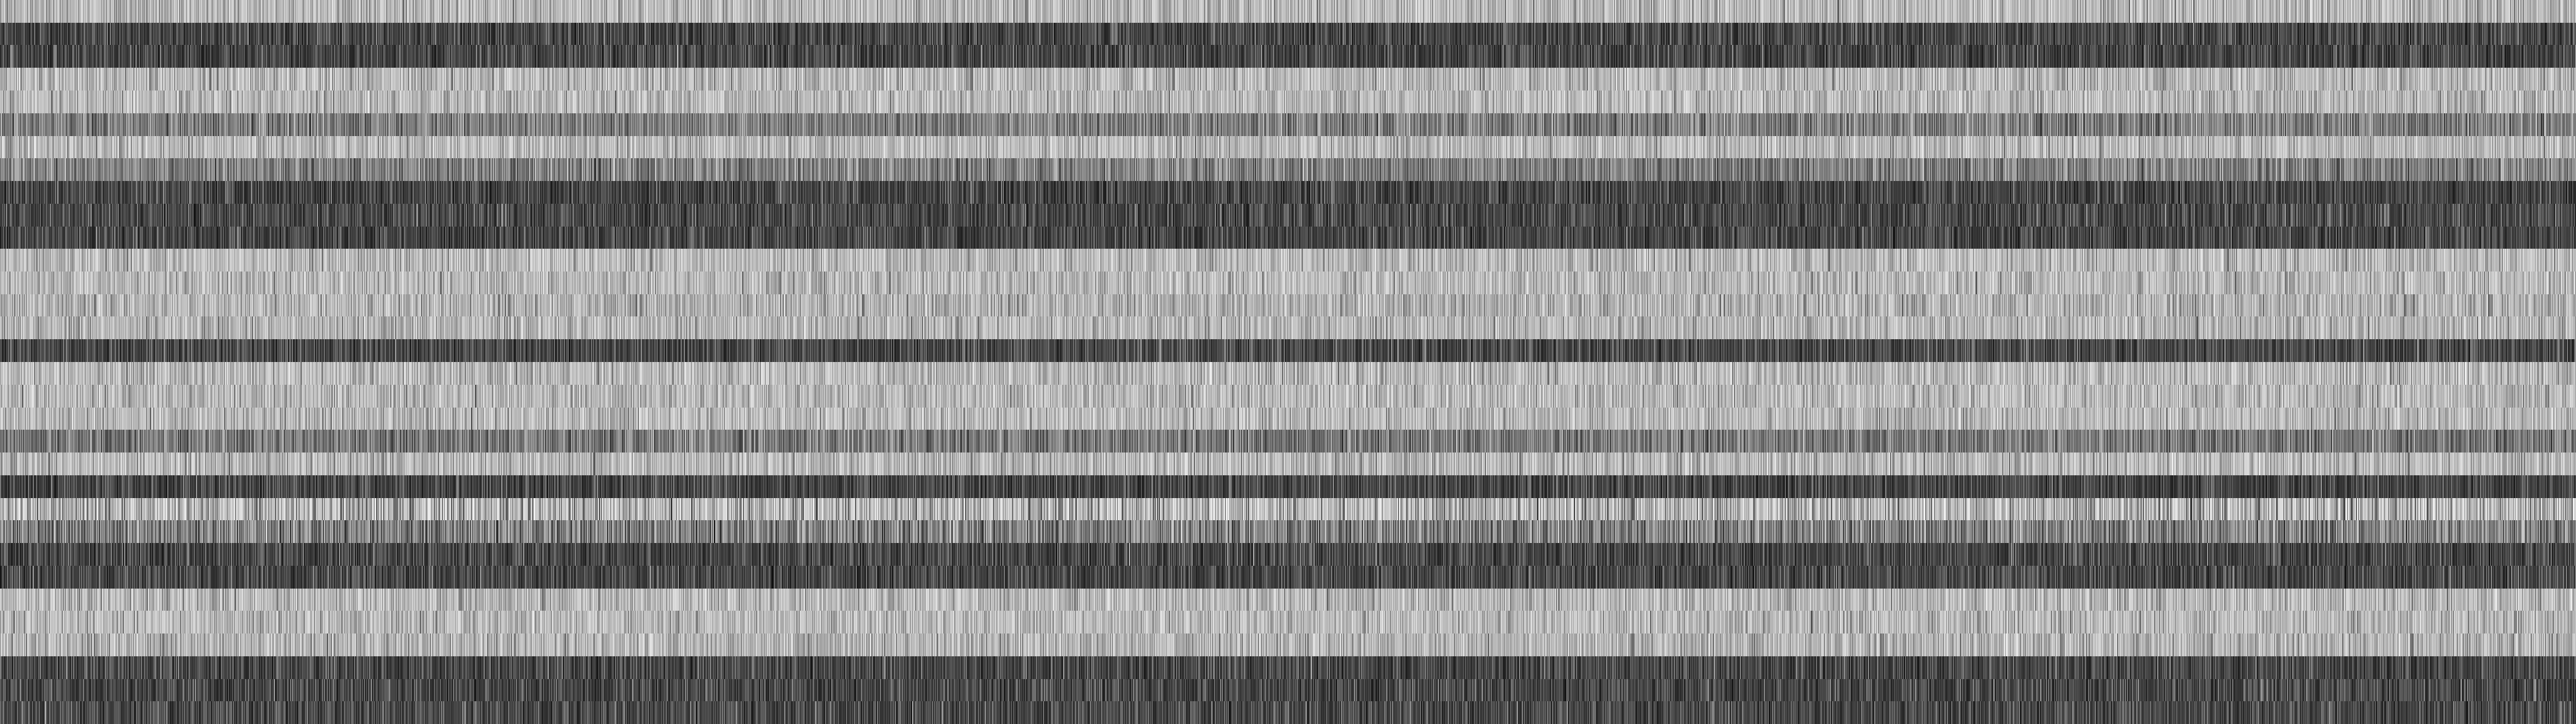

(6567, 32)
-5.1704283 4.866709


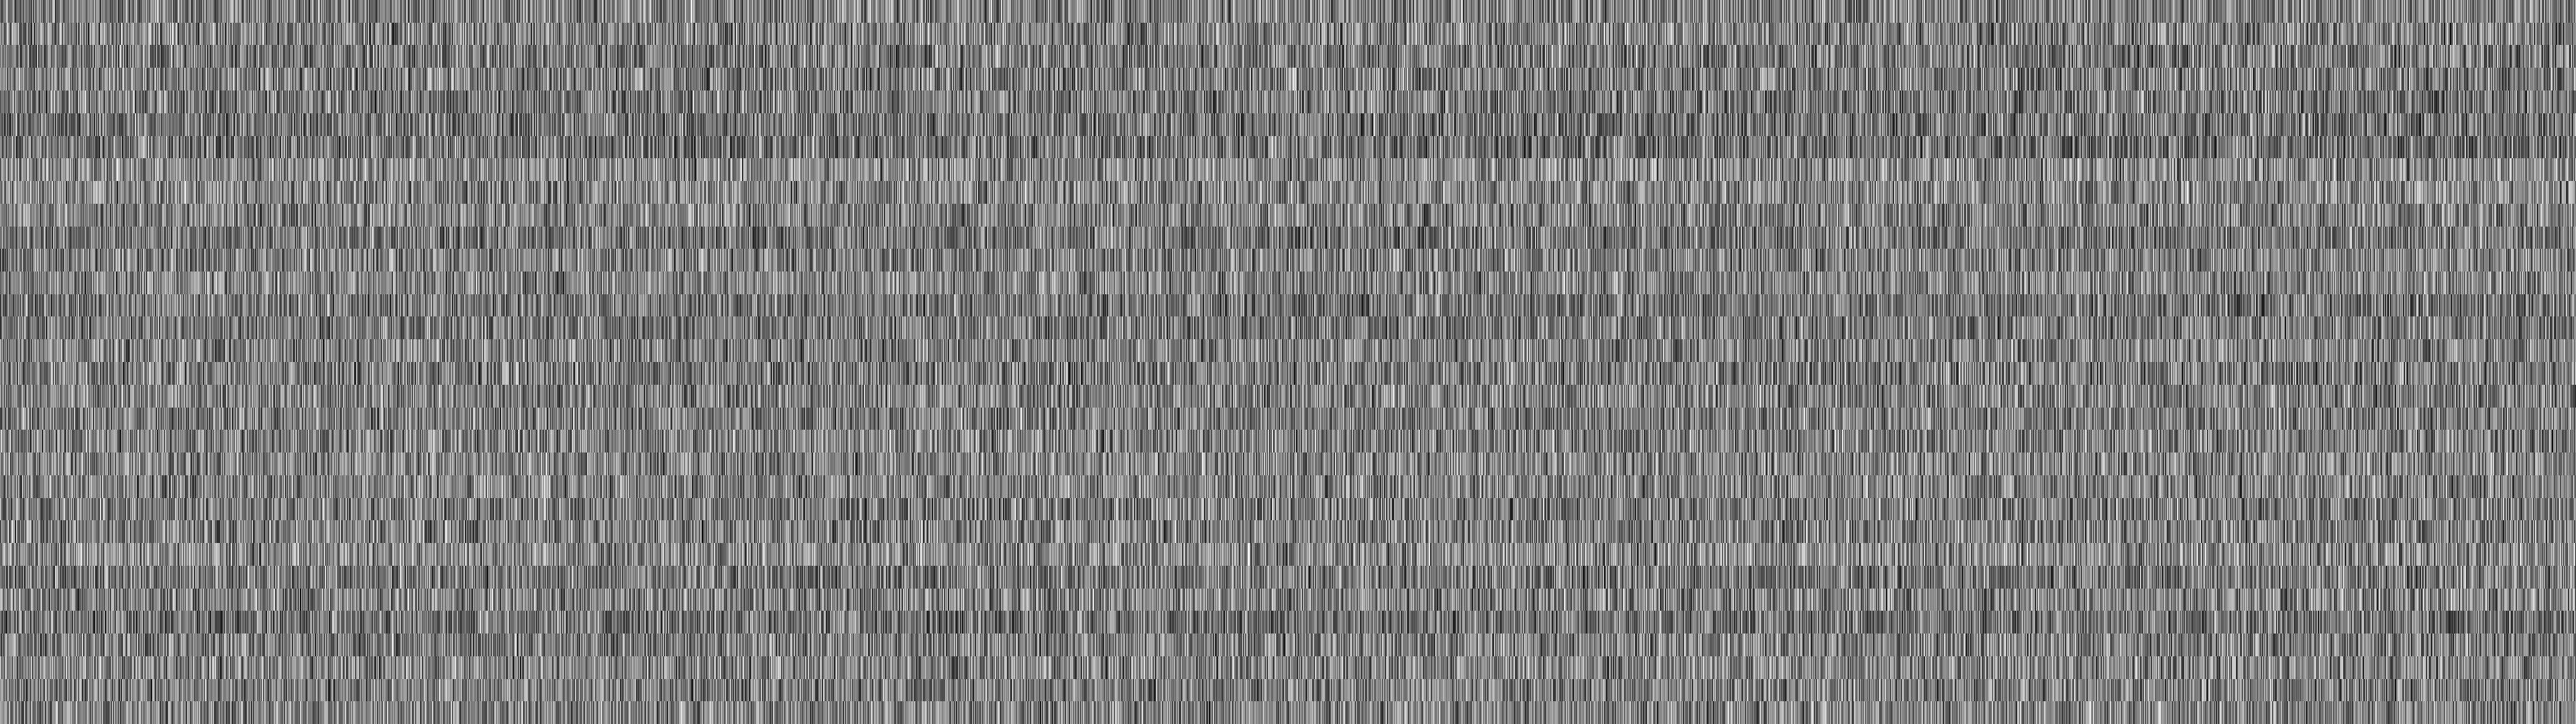

(4169, 32)
-3.6918638 4.701962


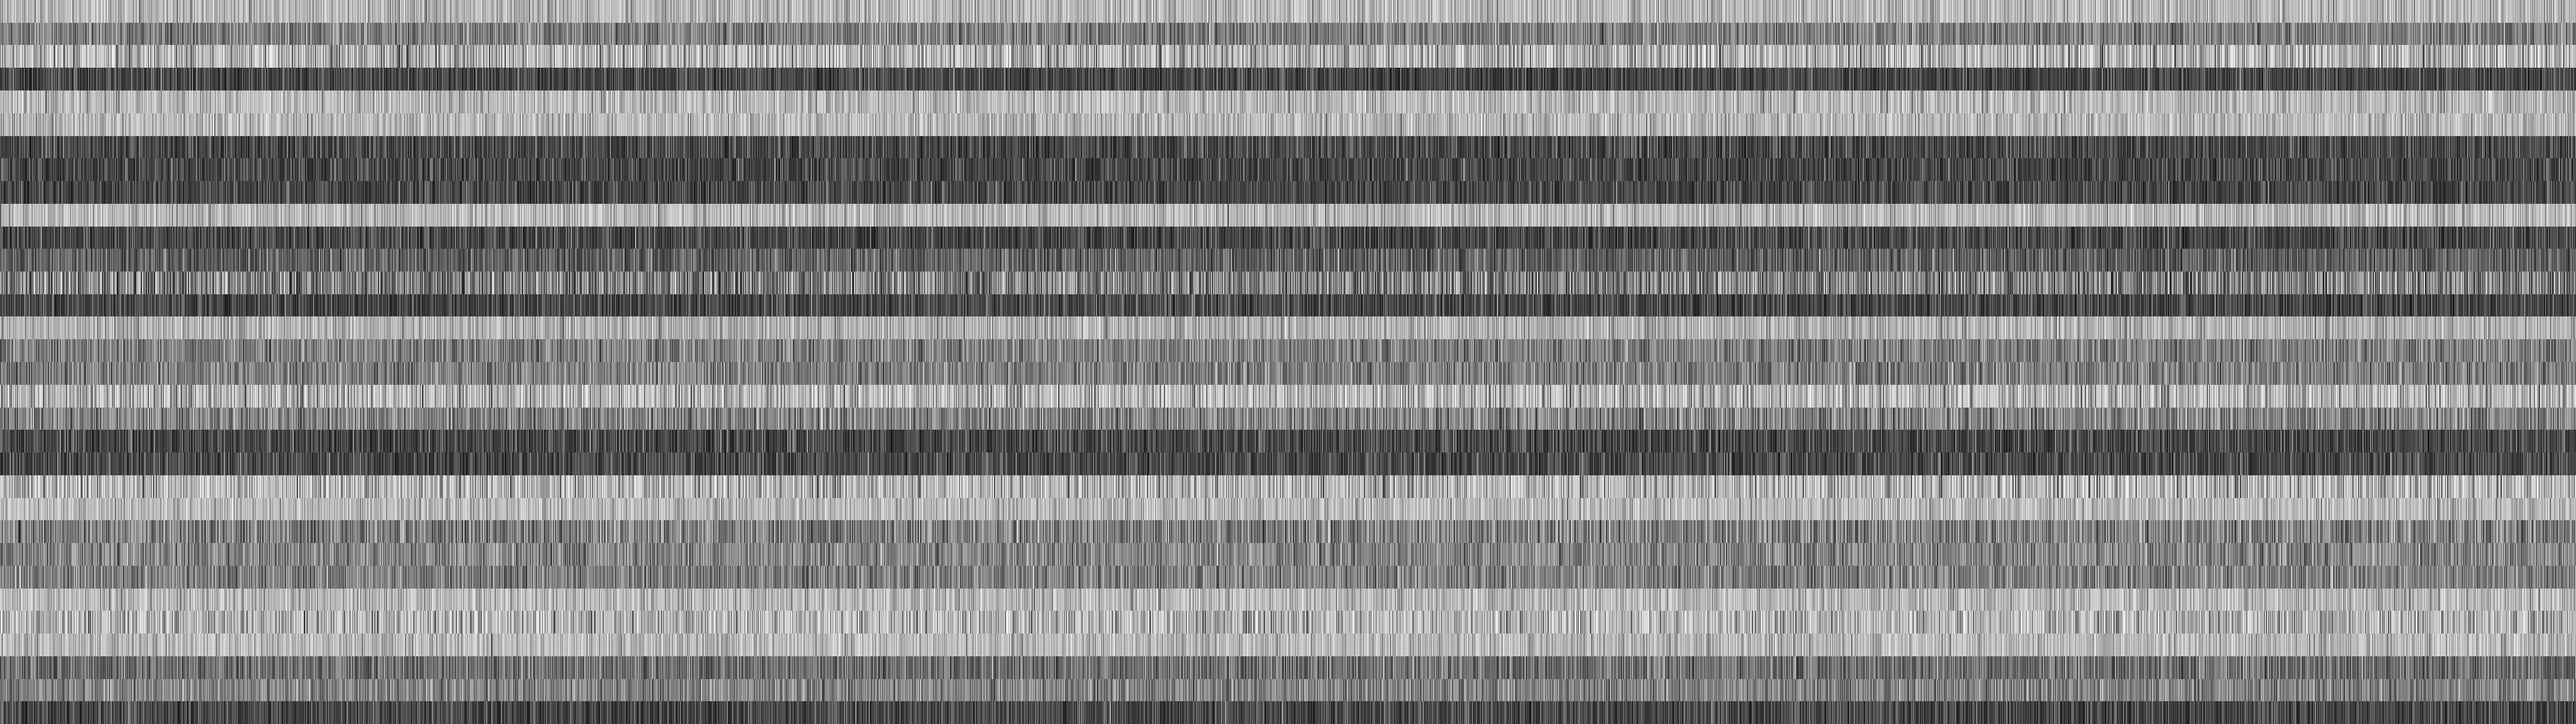

(6150, 32)
-4.7771654 4.710576


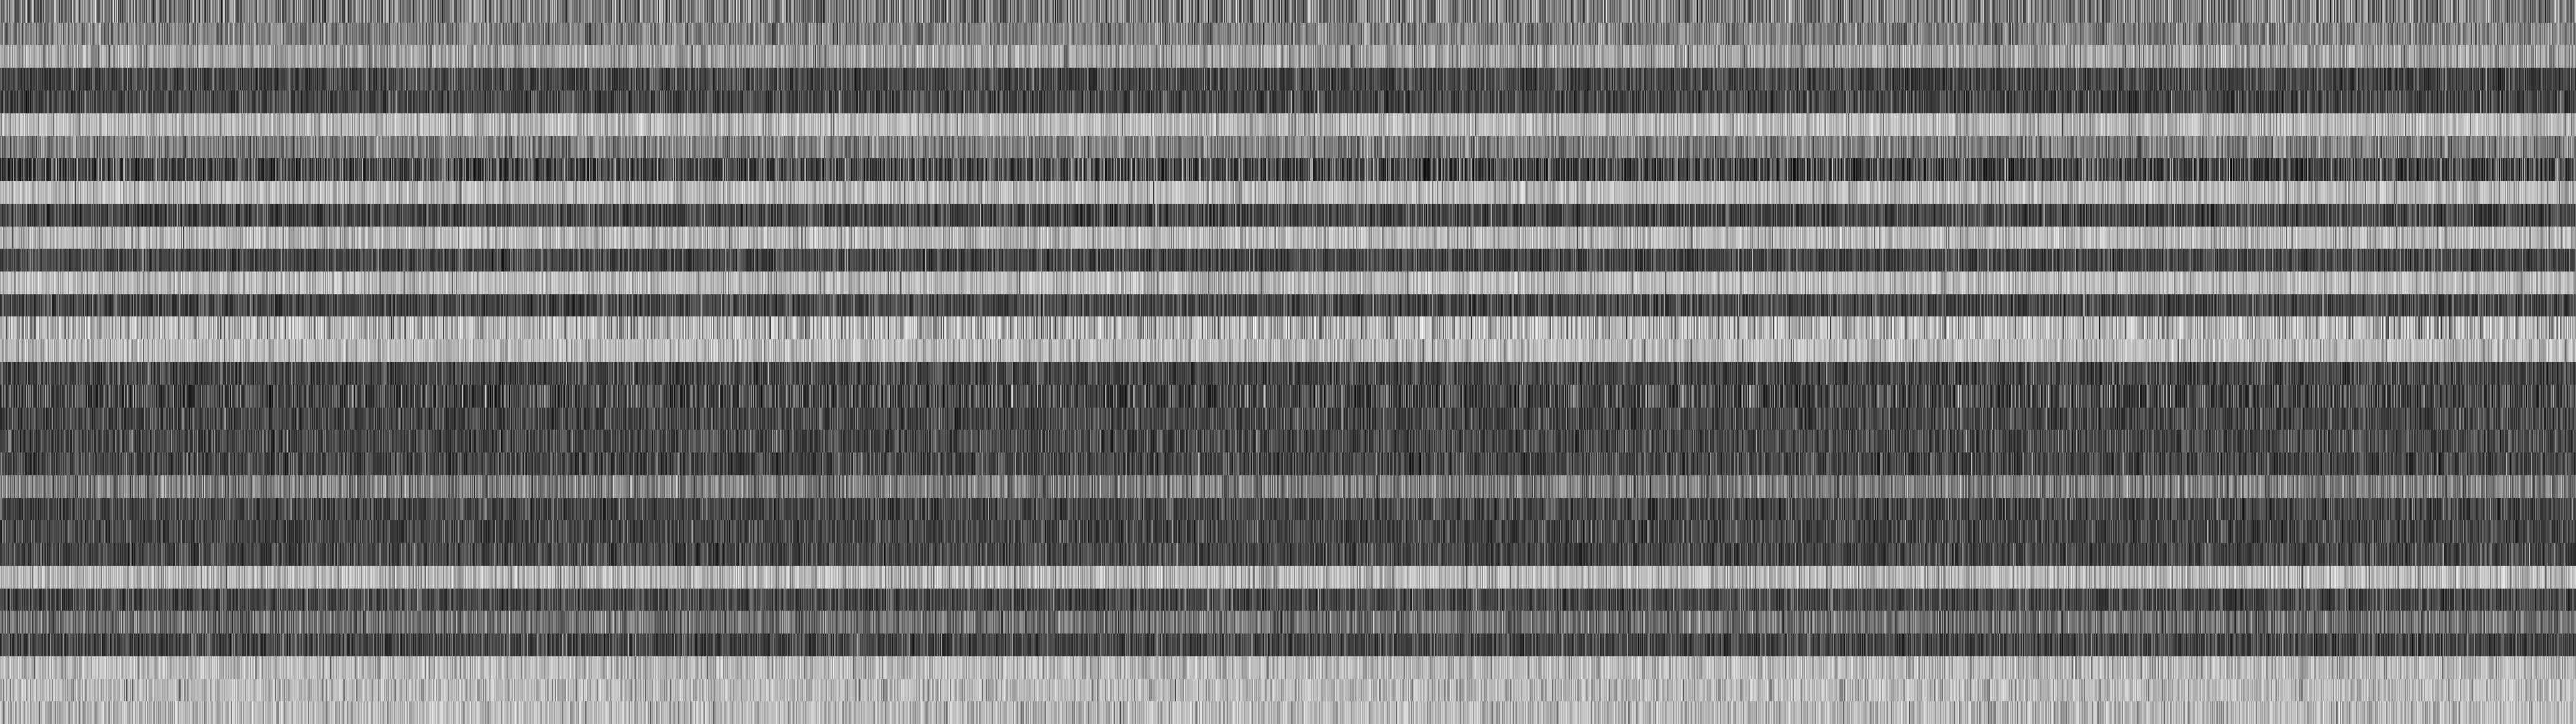

(5681, 32)
-3.5200367 3.4996562


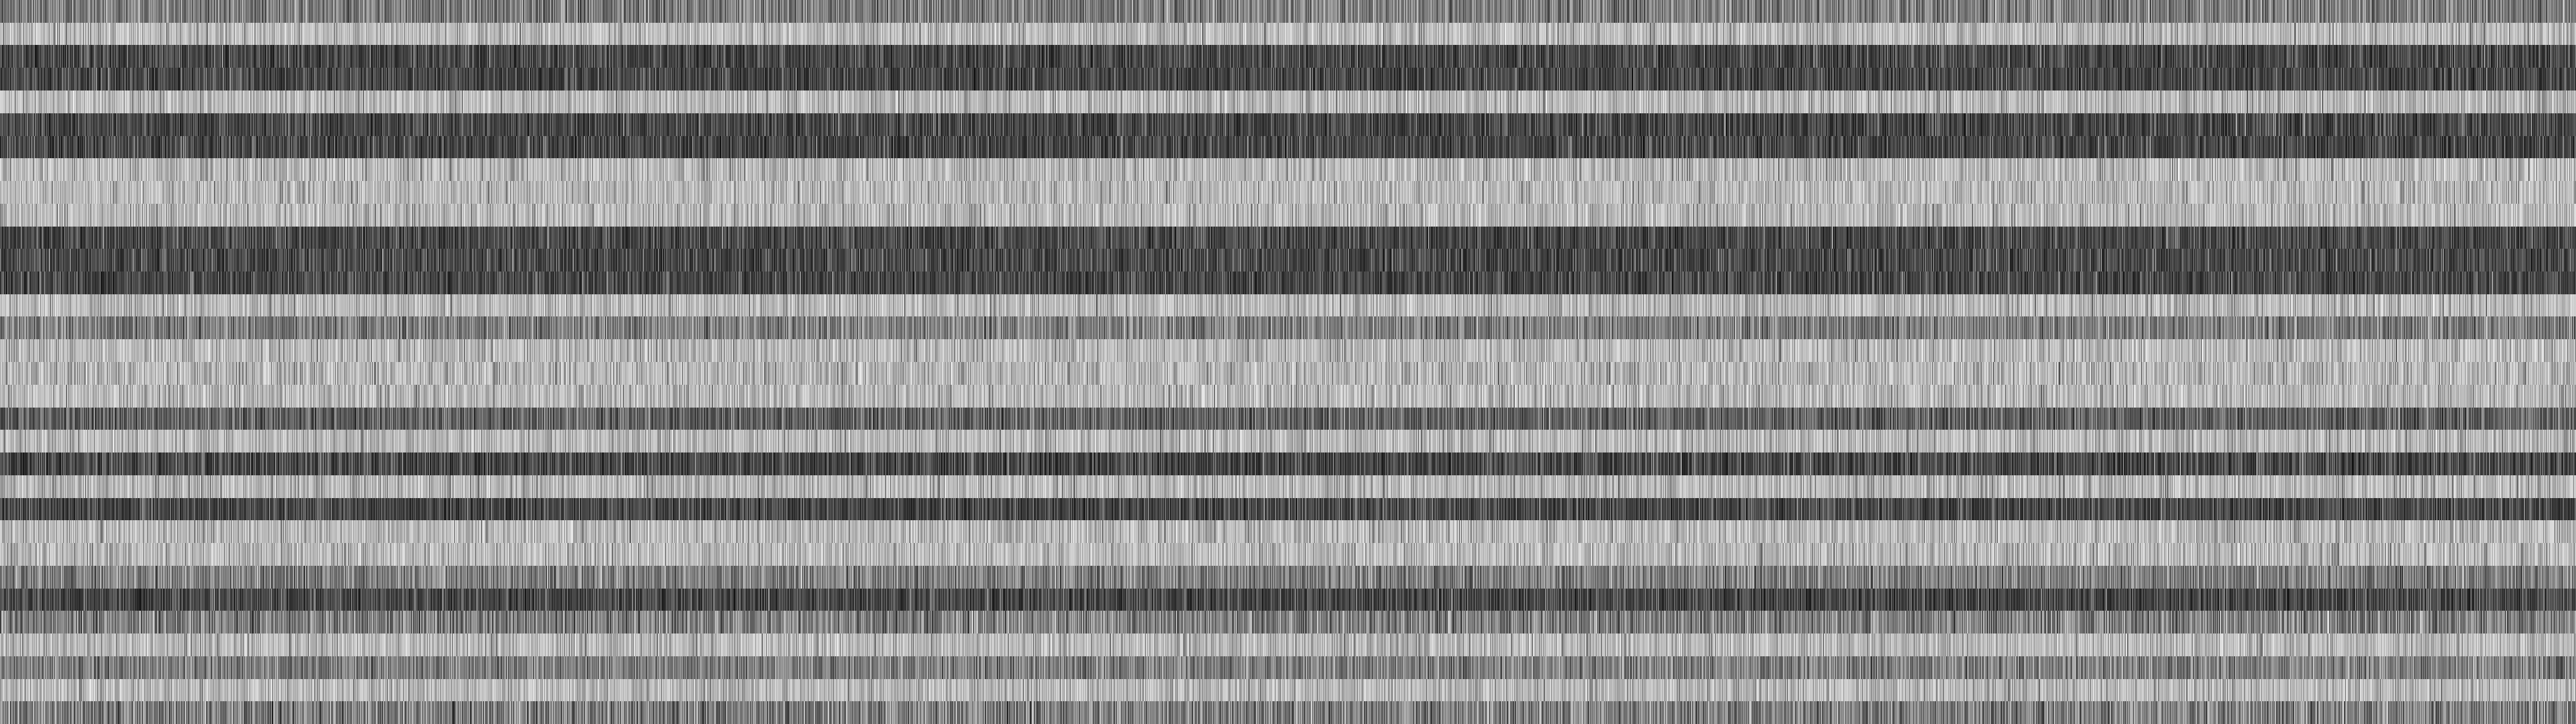

In [35]:
from PIL import Image, ImageColor
from IPython.display import display
from scipy.special import softmax
import math



colbase = np.array([
  ImageColor.getcolor("#47b1b9", "HSV"),
  ImageColor.getcolor("#499dbb", "HSV"),
  ImageColor.getcolor("#4a8abd", "HSV"),
  ImageColor.getcolor("#4c76be", "HSV"),
  ImageColor.getcolor("#4e62c0", "HSV"),
  ImageColor.getcolor("#504fc1", "HSV"),
  ImageColor.getcolor("#6751c3", "HSV"),
  ImageColor.getcolor("#7e52c5", "HSV")
])


for device, (loss, encoding) in encodings.items():

  print(encoding.shape)
  print( np.min(encoding), np.max(encoding))


  def sigmoid(x):
    return 1 / (1 + np.exp(-x))
      
  def lerp(t, x, y):
      return x + (y - x ) * t

  image = sigmoid(encoding)
  #
  std    = np.std(image, axis=0)
  mean   = np.mean(image, axis=0)


 


  v = image.reshape((image.shape[0], image.shape[1], 1))
  s = std.repeat(encoding.shape[0]).reshape((encoding.shape[0], encoding.shape[1], 1) ,  order='F')
  h = mean.repeat(encoding.shape[0]).reshape((encoding.shape[0], encoding.shape[1], 1),  order='F')

  h = lerp(h, 0.0, 1.0)
  s = lerp(s, 0.0, 0.0)
  v = lerp(v, 0.0, 1.0)


  img = np.concatenate((h,s,v), axis=-1)
  img = np.clip((img * 255).astype(np.uint8),0,255)

  img = Image.fromarray(img, mode="HSV" ).convert("RGB")
  img = img.rotate(90, expand=True)
  img = img.resize([1920 * 2, 1080], resample=Image.NEAREST)
  img.save(f"figures/encodings_{device}.jpg")

  display(img)


In [ ]:

# colors = [ 
#         "#47b1b9",
#         "#499dbb",
#         "#4a8abd",
#         "#4c76be",
#         "#4e62c0",
#         "#504fc1",
#         "#6751c3",
#         "#7e52c5"]

